Для README 

Прогноз оттока клиентов из банка

Описание работы :

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

На основании исторических данных нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.  

Необходимо постройть модель со значением *F1*-меры не меньше 0.59, дополнительно измеряя метрику *AUC-ROC*.

Описание данных :

* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — количество недвижимости у клиента
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата
* `Exited` — факт ухода клиента

План работы над проектом :

   1. [Подготовка данных:](#Step_1)
       * [Обзор и загрузка данных](#Step_1_1)
       * [Приведение названий столбцов к нижнему регистру](#Step_1_2)
       * [Обработка пропусков](#Step_1_3)
       * [Преобразование данных в нужные типы](#Step_1_4)
       * [Обработка дубликатов](#Step_1_5)
       * [Вывод](#Step_1_6)
   2. [Исследование задачи](#Step_2)
       * [Исследование баланса классов](#Step_2_1)
       * [Изучение модели без учёта дисбаланса](#Step_2_2)
       * [Вывод](#Step_2_3)
   3. [Борьба с дисбалансом](#Step_3)
       * [Исследование баланса классов](#Step_3_1)
       * [Вывод](#Step_3_2)
   4. [Тестирование модели](#Step_4)
   5. [Общий вывод](#Step_5)
           

Используемые библиотеки:

- pandas 
- numpy
- sklearn

Используемые инструменты:

- from sklearn.model_selection import train_test_split
- from sklearn.tree import DecisionTreeClassifier
- from sklearn.metrics import accuracy_score
- from sklearn.metrics import f1_score
- from sklearn.metrics import roc_auc_score
- from sklearn.utils import shuffle
- from sklearn.ensemble import RandomForestClassifier
- from sklearn.linear_model import LogisticRegression
_____________________________________________________________
 - info, head, tail, describe 
 - map(str.lower, data.columns)
 - drop
 - dropna
 - loc
 - astype
 - duplicated().sum()
 - дисбаланс классов 
 - value_counts(normalize=True)
 - plot(kind='bar')
 - value_counts()
 - get_dummies(df, drop_first = True)
 _____________________________________________________________
 - train_test_split(df, test_size=0.40, random_state=12345)
 _____________________________________________________________
 - model = DecisionTreeClassifier(random_state=12345, max_depth= depth)
 - model.fit(features_train,target_train)
 - result = model.score(features_valid,target_valid)
 _____________________________________________________________
 - target_pred_constant = pd.Series(0, index=target_train.index)
 - print(accuracy_score(target_train, target_pred_constant))
 - f1_score(target_valid,predicted_valid)
_____________________________________________________________ 
 - probabilities_valid = model.predict_proba(features_valid)
 - probabilities_one_valid = probabilities_valid[:, 1]
 - print("AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid))
 _____________________________________________________________
 - взвешивание классов - class_weight = 'balanced'
 - Upsampling
 - downsample

______________

## Прогноз оттока клиентов из банка

#### Описание работы :

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

На основании исторических данных нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.  

Необходимо постройть модель со значением *F1*-меры не меньше 0.59, дополнительно измеряя метрику *AUC-ROC*.

#### Описание данных :

* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — количество недвижимости у клиента
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMember` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата
* `Exited` — факт ухода клиента

#### План работы над проектом :

   1. [Подготовка данных:](#Step_1)
       * [Обзор и загрузка данных](#Step_1_1)
       * [Приведение названий столбцов к нижнему регистру](#Step_1_2)
       * [Обработка пропусков](#Step_1_3)
       * [Преобразование данных в нужные типы](#Step_1_4)
       * [Обработка дубликатов](#Step_1_5)
       * [Вывод](#Step_1_6)
   2. [Исследование задачи](#Step_2)
       * [Исследование баланса классов](#Step_2_1)
       * [Изучение модели без учёта дисбаланса](#Step_2_2)
       * [Вывод](#Step_2_3)
   3. [Борьба с дисбалансом](#Step_3)
       * [Исследование баланса классов](#Step_3_1)
       * [Вывод](#Step_3_2)
   4. [Тестирование модели](#Step_4)
   5. [Общий вывод](#Step_5)
           

## 1. Подготовка данных <a id="Step_1"></a>

### 1.1 Обзор и загрузка данных <a id="Step_1_1"></a>

Загрузим необходимые для работы библиотеки.

In [1]:
import pandas as pd

import numpy as np

# для разделения данных на выборки
from sklearn.model_selection import train_test_split

# для использования алгоритма классификации "решающее дерево"
from sklearn.tree import DecisionTreeClassifier

# для определения количества правильных ответов
from sklearn.metrics import accuracy_score

# для вычисления значения F1-меры
from sklearn.metrics import f1_score

# для расчёта метрики AUC-ROC
from sklearn.metrics import roc_auc_score

# для перемешивания объектов при использовании техники борьбы с дисбалансом upsampling
from sklearn.utils import shuffle

# для использования алгоритма классификации "случайный лес"
from sklearn.ensemble import RandomForestClassifier

# для использования алгоритма логистической регрессии
from sklearn.linear_model import LogisticRegression

Откроем файл с данными и изучим общую информацию.

In [2]:
df = pd.read_csv('/datasets/Churn.csv', sep=',')

In [3]:
display(df)
df.info()
df.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Рассмотрим более подробно каждый столбец фрейма `df`:

* `RowNumber` — индекс строки в данных. Столбец можно будет удалить, так как он полностью дублирует функцию индекса.
* `CustomerId` — уникальный идентификатор клиента. Без аномалий.
* `Surname` — фамилия. Бесполезный для нас признак. Его функцию уже выполняет уникальный id каждого клиента. 
* `CreditScore` — кредитный рейтинг. Значения все на месте, тип данных адекватный. 
* `Geography`, `Gender`, `Age`  — страна проживания, пол, возраст соотвественно. Пропуски отсуствуют.
* `Tenure` — количество недвижимости у клиента. Почти 10% пропуск и дробный тип данных, который тут нам совершенно ни к чему.
* `Balance` — баланс на счёте. Данные все на месте, но от копеек можно будет избавиться.
* `NumOfProducts`, `HasCrCard`, `IsActiveMember` — количество продуктов банка, используемых клиентом, наличие кредитной карты и активность клиента. Без замечений.
* `EstimatedSalary` — предполагаемая зарплата. Пропусков нет, данные округлим до целых чисел.
* `Exited` — факт ухода клиента. Наш целевой признак. Все данные на месте.

### 1.2 Приведение названий столбцов к нижнему регистру <a id="Step_1_2"></a>

In [4]:
df.columns = map(str.lower, df.columns)

Здесь же удалим признаки, идентифицированные нами, как явно лишние.

In [5]:
df.drop(['rownumber', 'surname'], axis = 'columns', inplace = True)

### 1.3 Обработка пропусков <a id="Step_1_3"></a>

Единственным признаком, где у нас существуют пропуски является `tenure`. Хороший вопрос, что является большей потерей для построения модели: искажение 10% данных одного признака, при заполнении существующих пропусков тем или иным образом, или удаления 10% всех объектов, которые соответствуют имеющимся пропускам, но чистые данные на выходе. 

Руководствуясь принципом бритвы Оккама, я предпочту выбрать кратчайший путь: удалим все объекты с пропусками. 
В случае успешного решения поставленной задачи и преодоления минимально необходимого порога `F1-меры`, будем считать данное решение правомерным.

Также, относительно природы данных пропусков можно предположить, что здесь, как всегда, может быть заложена ошибка автоматики или/либо человеческий фактор при операциях с данными от начала получения данных банков до передачи в качестве исходной информации нам, для решения поставленной задачи. Ещё одна версия может заключаться в том, что у банк просто нет информации о владении недвижимостью теми или иными клиентами, так как клиенты, в свою очередь, просто отказались её сообщать. Нельзя исключить и какую-то комбинацию описанных выше признаков.

In [6]:
df.dropna(subset = ['tenure'], inplace = True) 

### 1.4 Преобразование данных в нужные типы  <a id="Step_1_4"></a>

Изменим тип данных на `int` в столбцах `tenure`, `balance`, `estimatedsalary`.

In [7]:
df.loc[:,['tenure', 'balance', 'estimatedsalary']] = (df
                                                      .loc[:,['tenure'
                                                              , 'balance'
                                                              , 'estimatedsalary']]
                                                      .astype('int'))

### 1.5 Обработка дубликатов  <a id="Step_1_5"></a>

Проверим фрейм на наличие полных дубликатов.

In [8]:
print(df.duplicated().sum()) 

0


Полные дубликаты отсутствуют. На всякий случай проверим ещё дубликаты уникальных `id` клиентов.

In [9]:
print(df['customerid'].duplicated().sum()) 

0


Также ничего.

### 1.6 Вывод  <a id="Step_1_6"></a>

   1. *Данные и необходимые для работы библиотеки успешно загружены.*
   2. *Проведён первичный анализ, определены и выполнены необходимые действия для последующей корректной подготовки и предобработки имеющейся информации:*
    * *Регистр заголовков изменён на нижний;*
    * *Для столбцов `tenure`, `balance`, `estimatedsalary` изменён тип данных;*
    * *Объекты, имеющий пропуск в столбце `tenure`, удалены; *
    * *Проверка на наличие дубликатов произведена. Дубликатов не обнаружено;*

## 2. Исследование задачи <a id="Step_2"></a>

### 2.1 Исследование баланса классов  <a id="Step_2_1"></a>

Исследуем баланс классов нашего целевого признака `Exited`.

In [10]:
class_frequency = df['exited'].value_counts(normalize=True)
print(class_frequency)

0    0.796062
1    0.203938
Name: exited, dtype: float64


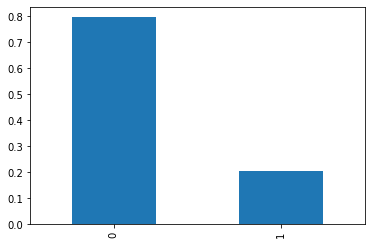

In [11]:
class_frequency.plot(kind='bar')

Явный перекос в сторону тех, кто остался, почти 80% на 20%, что в целом и ожидаемо.

### 2.2 Изучение модели без учёта дисбаланса  <a id="Step_2_2"></a>

Построим модель без учёта дисбаланса.

Для корректной работы модели нам необходимо признаки категориальные перевести в численные. Нас интересуют признаки `geography` и `gender`. Посмотрим какие значения они содержат.

In [12]:
df['geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: geography, dtype: int64

In [13]:
df['gender'].value_counts()

Male      4974
Female    4117
Name: gender, dtype: int64

Исходя из небольшого количества вида значений в каждом из признаков, воспользуемся техникой прямого кодирования (One-Hot Encoding, OHE).

Чтобы не попасть в так называемую дамми-ловушку при добавлении новых столбцов после применения техники OHE, удалим в каждом из случаев первый столбец из добавленных.

In [14]:
df = pd.get_dummies(df, drop_first = True)

Далее, разделим исходные данные на обучающую, валидационную и тестовую выборки в пропорции 60% / 20% / 20% соответственно.

Сначала разобьём данные в пропорции 60 / 40, сформировав тем самым обучающий набор.

In [15]:
df_train, df_other = train_test_split(df, test_size=0.40, random_state=12345)

Теперь, оставшиеся 40% данных, снова разделим пополам, получив тем самым валидационную и тестовую выборки в пропорции 20% каждая от исходных данных.

In [16]:
df_valid, df_test = train_test_split(df_other, test_size=0.50, random_state=12345)

Перед тем, как приступить непосредственно к исследованию моделей, создадим переменные для хранения признаков и целевого признака каждой из выборок.

Обучающая выборка.

In [17]:
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']

Валидационная выборка. 

In [18]:
features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']

Тестовая выборка.

In [19]:
features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

Для анализа модели, построенной без учёта дисбаланса классов, выберем алгоритм классификациий решающего дерева `DecisionTreeClassifier`. Определим лучшее значение `accuracy`, изменяя гиперпараметр `max_depth`.

In [20]:
best_model = None
best_result = 0

for depth in range(1,30): 
    
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth)
    model.fit(features_train,target_train)
    result = model.score(features_valid,target_valid)
    
    if result > best_result:
        best_model = model 
        best_result = result
        best_depth = depth

print("Best_depth:", best_depth)     
print("Accuracy:", best_result)

Best_depth: 6
Accuracy: 0.8586358635863587


Проанализируем частоты классов в результатах предсказаний решающего дерева.

0    0.887789
1    0.112211
dtype: float64


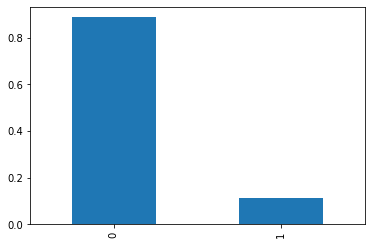

In [21]:
model = DecisionTreeClassifier(random_state=12345, max_depth = 6)
model.fit(features_train,target_train)
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)

print(class_frequency)

class_frequency.plot(kind='bar')

Результат сместися почти на 9% относительно баланса классов в исходных данных.

Посмотрим теперь какой результат нам даст константная модель.

In [22]:
target_pred_constant = pd.Series(0, index=target_train.index)

print(accuracy_score(target_train, target_pred_constant))

0.7935460212687936


Разница с решающим деревом около 6% в пользу последнего.

Тем не менее метрика `accuracy` в данном случае не является для нас показательной. Для дальнейшего анализа качества построенной модели, будем пользоваться метриками `F1-мерой` и `AUC-ROC`. 

Посчитаем `F1-меру` и `AUC-ROC` для нашей несбалансированной модели при использовании алгоритма решающего дерева.

In [23]:
print("F1_score:", f1_score(target_valid,predicted_valid))

F1_score: 0.557659208261618


In [24]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("AUC-ROC:", roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.8425699070605623


### 2.3 Вывод <a id="Step_2_3"></a>

Сильный дисбаланс классов, достаточно далёкий от соотношения 1:1, значительно затрудняет обучение модели, но тем не менее модель, построенная на алгоритме решающего дерева, выдаёт не идеальные, но и не самые плохие результаты: 
   * `acccuracy` = 0.8586358635863587
   * `F1_score` = 0.557659208261618
   * `AUC-ROC` = 0.8425699070605623

Метрика `accuracy` не является для нас показательной, но `F1_score` и `AUC-ROC` будем считать отправными точками, взятыми для несбалансированной модели.

## 3. Борьба с дисбалансом <a id="Step_3"></a>

### 3.1 Применение способов борьбы с дисбалансом  <a id="Step_3_1"></a>

Для борьбы с дисбалансом можно воспользоваться следующими техниками: взвешивание классов, upsampling и downsampling. 

Посчитаем метрики `F1-меру` и `AUC-ROC`, используя каждую из техник, для решающего дерева, случайного леса и логистической регрессии. Сравним результаты между собой и с несбалансированной моделью и выберем лучший вариант из трёх.

#### Решающее дерево

*Взвешивание классов*

Установим аргумент `class_weight = 'balanced'` для модели решающего дерева. Также выберем при этом оптимальный гиперпараметр `max_depth`, определяющий размер решающего дерева. Рассчитаем метрики `F1-меру` и `AUC-ROC`.

In [25]:
best_model = None
best_result_f1 = 0

for depth in range(1,30): 
    
    model = DecisionTreeClassifier(random_state=12345
                                   , max_depth= depth
                                   , class_weight = 'balanced' )
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    
    if result_f1 > best_result_f1:
        best_model = model 
        best_depth = depth
        best_result_f1 = result_f1
        best_result_roc_auc = result_roc_auc

print("Best_depth = ", best_depth)    
print("F1-score = ", best_result_f1)
print("AUC-ROC = ", best_result_roc_auc) 

Best_depth =  5
F1-score =  0.5711252653927813
AUC-ROC =  0.8351765370717726


Размер дерева решений уменьшился, среднее гармоническое полноты и точности подросло, , а вот метрика `AUC-ROC` у нас немного изменилась в меньшую сторону.

*Upsampling*

Для реализации данной техники напишем функцию `upsample`, которая позволит нам увеличить количество объектов редкого класса и тем самым сбалансировать нашу модель.

На данный момент соотношение находится в пропорции 80% на 20%. Следовательно количество объектов, относящихся к классу 1 целевого признака, увеличим в 4 раза, за что в нашей функции будет отвечать переменная `repeat`.

In [26]:
def upsample(features, target, repeat):
    
    # разделим обучающую выборку на отрицательные и положительные объекты
    
    # features_zeros — признаки объектов с ответом «0»
    features_zeros = features[target == 0]
    
    # features_ones — признаки объектов с ответом «1»
    features_ones = features[target == 1]
    
    # target_zeros — целевой признак объектов, у которых ответы только «0»
    target_zeros = target[target == 0]
    
    # target_ones — целевой признак объектов, у которых ответы только «1»
    target_ones = target[target == 1]
    
    # Продублируем объекты положительного класса и объединим их с объектами отрицательного класса.
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # Перемешаем данные с помощью функции shuffle()
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Применим написанную функцию к тренировочным данным, обучим на них решающее дерево и посмотрим результат для `F1 - меры` и `AUC-ROC`.

In [27]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [28]:
best_model = None
best_depth = 0
best_result_f1 = 0
best_result_roc_auc = 0

for depth in range(1,30): 
    
    model = DecisionTreeClassifier(random_state=12345
                                   , max_depth= depth)
    model.fit(features_upsampled,target_upsampled)
    predictions_valid = model.predict(features_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    
    if result_f1 > best_result_f1:
        best_model = model 
        best_depth = depth
        best_result_f1 = result_f1
        best_result_roc_auc = result_roc_auc

print("Best_depth = ", best_depth)    
print("F1-score = ", best_result_f1)
print("AUC-ROC = ", best_result_roc_auc) 

Best_depth =  5
F1-score =  0.5711252653927813
AUC-ROC =  0.8351765370717726


Полностью аналогичный взвешиванию классов результат. 

*Downsampling*

Для реализации данной техники напишем функцию `downsample` по аналогии с функцией `upsample`, только в этот раз мы будем уменьшать частый класс, а не увеличивать редкий.

Изначально соотношение классов 80% на 20%. Следовательно количество объектов, относящихся к классу 0 целевого признака, уменьшим в 4 раза, за что в нашей функции будет отвечать переменная `fractio`.

In [29]:
def downsample(features, target, fraction):
    
    # также разделим обучающую выборку на отрицательные и положительные объекты
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Сократим количество объектов отрицательного класса и объединим их с объектами положительного.
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]) 
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]) 
    
    return features_downsampled, target_downsampled

Применим написанную функцию к тренировочным данным, обучим на них решающее дерево и посмотрим результат для `F1 - меры` и `AUC-ROC`.

In [30]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [31]:
best_model = None
best_depth = 0
best_result_f1 = 0
best_result_roc_auc = 0

for depth in range(1,30): 
    
    model = DecisionTreeClassifier(random_state=12345
                                   , max_depth= depth)
    model.fit(features_downsampled,target_downsampled)
    predictions_valid = model.predict(features_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    
    if result_f1 > best_result_f1:
        best_model = model 
        best_depth = depth
        best_result_f1 = result_f1
        best_result_roc_auc = result_roc_auc

print("Best_depth = ", best_depth)    
print("F1-score = ", best_result_f1)
print("AUC-ROC = ", best_result_roc_auc) 

Best_depth =  6
F1-score =  0.5605214152700186
AUC-ROC =  0.8326307806434156


В случае данной техники ухудшилась каждая из характеристик. 

Учитывая контекст нашей задачи и тот факт, что ни одна из техник, применённая в рамках алгоритма решающего дерева, хоть и дала лучший по сравнению с несбалансированной моделью результаты, тем не менее не позволила получить нам `F1-score` выше 0.59. Таким образом с этим видом классификатора в нашем исследовании мы прощаемся. 

Воспользуемся теми же техниками борьбы с дисбалансом, но на этот раз для случайного леса.

#### Случайный лес

*Взвешивание классов*

Как и для решающего дерева, установим аргумент `class_weight = 'balanced'`. Также выберем при этом оптимальный гиперпараметр `n_estimators`, определяющий размер решающего дерева. Рассчитаем метрики `F1-меру` и `AUC-ROC`.

In [32]:
best_model = None
best_result_f1 = 0

for est in range(10, 150, 10): 
    
    model = RandomForestClassifier(random_state=12345
                                   , n_estimators= est
                                   , class_weight = 'balanced')
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    
    if result_f1 > best_result_f1:
        best_model = model 
        best_est = est
        best_result_f1 = result_f1
        best_result_roc_auc = result_roc_auc

print("Best_est = ", best_est)    
print("F1-score = ", best_result_f1)
print("AUC-ROC = ", best_result_roc_auc) 

Best_est =  30
F1-score =  0.5530434782608695
AUC-ROC =  0.8582613753711411


`F1-score` почти как для несбалансированной модели. А вот `AUC-ROC` подросла. Посмотрим как покажут себя другие техники для данного алгоритма. 

*Upsampling*

In [33]:
best_model = None
best_result_f1 = 0

for est in range(10, 150, 10): 
    
    model = RandomForestClassifier(random_state=12345
                                   , n_estimators= est)
    model.fit(features_upsampled,target_upsampled)
    predictions_valid = model.predict(features_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    
    if result_f1 > best_result_f1:
        best_model = model 
        best_est = est
        best_result_f1 = result_f1
        best_result_roc_auc = result_roc_auc

print("Best_est = ", best_est)    
print("F1-score = ", best_result_f1)
print("AUC-ROC = ", best_result_roc_auc) 

Best_est =  110
F1-score =  0.6262924667651403
AUC-ROC =  0.8652451786171186


Рост обеих метрик! И лучший на данный момент результат. Посмотрим, что нам даст последняя техника downsampling.

*Downsampling*

In [34]:
best_model = None
best_result_f1 = 0

for est in range(10, 150, 10): 
    
    model = RandomForestClassifier(random_state=12345
                                   , n_estimators= est)
    model.fit(features_downsampled,target_downsampled)
    predictions_valid = model.predict(features_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    
    if result_f1 > best_result_f1:
        best_model = model 
        best_est = est
        best_result_f1 = result_f1
        best_result_roc_auc = result_roc_auc 

print("Best_est = ", best_est)    
print("F1-score = ", best_result_f1)
print("AUC-ROC = ", best_result_roc_auc) 

Best_est =  40
F1-score =  0.6020202020202021
AUC-ROC =  0.8600459819201594


Результат уступает предыдущему варианту по каждой из метрик.

Далее воспользуемся алгоритмом классификации: логистическая регрессия. Оценим, как для него будут меняться значения наших ключевых метрик `F1-score` и `AUC-ROC` в зависимости от применённой техники борьбы с дисбалансом.

#### Логистическая регрессия

*Взвешивание классов*

Установим аргумент `class_weight = 'balanced'` и рассмотрим изменения для нескольких гиперпараметров: 
 - `solver` - алгоритм использующийся для решения проблем оптимизации; 
 - `C` - параметр регуляризации;
 - `tol` - указывает алгоритму оптимизации, когда следует остановиться.
 
Ключевыми метриками для нас будут являться всё те же `F1-меру` и `AUC-ROC`.

In [35]:
best_model = None
best_result_f1 = 0
best_result_roc_auc = 0
solver_list = ['lbfgs', 'liblinear']

for solver in solver_list:
    for c in np.arange(0.1, 1.0, 0.1):
        for tol in np.arange(0.00002, 0.00042, 0.00002):

            model = LogisticRegression(random_state=12345
                               , C = c
                               , tol = tol
                               , solver = solver
                               , class_weight = 'balanced')
    
            model.fit(features_train,target_train)
            predictions_valid = model.predict(features_valid)
            result_f1 = f1_score(target_valid, predictions_valid)
    
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    
            if result_f1 > best_result_f1:
                best_model = model 
                best_solver = solver
                best_c = c
                best_tol = tol
                best_result_f1 = result_f1
                best_result_roc_auc = result_roc_auc 

print("Best_solver = ", best_solver)            
print("Best_C = ", best_c)
print("Best_tol = ", best_tol)
print("F1-score = ", best_result_f1)
print("AUC-ROC = ", best_result_roc_auc) 

Best_solver =  liblinear
Best_C =  0.30000000000000004
Best_tol =  6.000000000000001e-05
F1-score =  0.5173745173745175
AUC-ROC =  0.7687889893733537


Результаты, скажем прямо, так себе. Посмотрим какой результат дадут остальные техники борьбы с дисбалансом.

*Upsamplimg*

In [36]:
best_model = None
best_result_f1 = 0
best_result_roc_auc = 0
solver_list = ['lbfgs', 'liblinear']

for solver in solver_list:
    for c in np.arange(0.1, 1.0, 0.1):
        for tol in np.arange(0.00002, 0.00042, 0.00002):

            model = LogisticRegression(random_state=12345
                               , C = c
                               , tol = tol
                               , solver = solver
                               , class_weight = 'balanced')
    
            model.fit(features_upsampled,target_upsampled)
            predictions_valid = model.predict(features_valid)
            result_f1 = f1_score(target_valid, predictions_valid)
    
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    
            if result_f1 > best_result_f1:
                best_model = model 
                best_solver = solver
                best_c = c
                best_tol = tol
                best_result_f1 = result_f1
                best_result_roc_auc = result_roc_auc 

print("Best_solver = ", best_solver)            
print("Best_C = ", best_c)
print("Best_tol = ", best_tol)
print("F1-score = ", best_result_f1)
print("AUC-ROC = ", best_result_roc_auc) 

Best_solver =  liblinear
Best_C =  0.5
Best_tol =  4e-05
F1-score =  0.516441005802708
AUC-ROC =  0.7670954999199273


Результат даже несколько хуже, чем у взвешивания классов.

*Downsampling*

In [37]:
best_model = None
best_result_f1 = 0
best_result_roc_auc = 0
solver_list = ['lbfgs', 'liblinear']

for solver in solver_list:
    for c in np.arange(0.1, 1.0, 0.1):
        for tol in np.arange(0.00002, 0.00042, 0.00002):

            model = LogisticRegression(random_state=12345
                               , C = c
                               , tol = tol
                               , solver = solver
                               , class_weight = 'balanced')
    
            model.fit(features_downsampled,target_downsampled)
            predictions_valid = model.predict(features_valid)
            result_f1 = f1_score(target_valid, predictions_valid)
    
            probabilities_valid = model.predict_proba(features_valid)
            probabilities_one_valid = probabilities_valid[:, 1]
            result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    
            if result_f1 > best_result_f1:
                best_model = model 
                best_solver = solver
                best_c = c
                best_tol = tol
                best_result_f1 = result_f1
                best_result_roc_auc = result_roc_auc 

print("Best_solver = ", best_solver)            
print("Best_C = ", best_c)
print("Best_tol = ", best_tol)
print("F1-score = ", best_result_f1)
print("AUC-ROC = ", best_result_roc_auc) 

Best_solver =  liblinear
Best_C =  0.30000000000000004
Best_tol =  2e-05
F1-score =  0.5085066162570888
AUC-ROC =  0.7661014952407423


Ещё более удручающие результаты, чем для 2-х предыдущих техник. 

### 3.2 Вывод  <a id="Step_3_2"></a>

Итак. Воспользовавшись тремя техниками борьбы с дисбалансом (взвшивание классов, upsampling, downsampling) для трёх алгоритмов классификации (решающее дерево, случайный лес, логистическая регрессия), мы получили лучший результат для случайного леса, к которому применили технику upsampling, получив на выходе следующие значения ключевых метрик: 
* `F1-score` =  0.6262924667651403
* `AUC-ROC` =  0.8652451786171186

## 4. Тестирование модели <a id="Step_4"></a>

Проведём финальное тестирование нашей лучшей модели.

In [38]:
model = RandomForestClassifier(random_state=12345, n_estimators= 130)
model.fit(features_upsampled,target_upsampled)
predictions_test = model.predict(features_test)
result_f1 = f1_score(target_test, predictions_test)
    
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

result_roc_auc = roc_auc_score(target_test, probabilities_one_test)
 
print("F1-score = ", result_f1)
print("AUC-ROC = ", result_roc_auc) 

F1-score =  0.6006191950464397
AUC-ROC =  0.8511648307288634


Ключевые метрики несколько ниже, чем на валидационной выборке, но, тем не менее, условие успешного выполнения проекта выполняется: `F1-score` > 0.59.

## 5. Общий вывод <a id="Step_5"></a>

На основании предоставленных банком исторических данных поведения клиетов, нами было проведенно исследование на предмет построения модели, способной предсказать, какой клиет в ближайшем будущем скорее всего уйдёт, а какой останется. Для банка более чем актуальный вопрос, так как (и это оговорено в условии) удержать клиента дешевле, чем привлечь нового. 

Данные были загружены, изучены и прошли необходимую для дальнейшей работы предобработку. 

Основной проблемой в предоставленных данных являлся явный дисбаланс классов (80% - 0, 20% - 1), что в свою очередь существенно затрудняет обучение модели. 

Для борьбы с дисбалансом мы использовали три техники: взвешивание классов, upsampling и downsampling. Эти техники были использованы для построения моделей в рамках трёх алгоритмов классификации: решающего дерева, случайного леса и логистической регрессии. 

Результатом исследования, применения техник и алгоритмов, стала модель (лучшая из полученных) на основе алгоритма решающего дерева, где для борьбы с дисбалансом была применена техника upsampling. На тестовой выборке были получены следующие значения ключевых метрик: 
* `F1-score` =  0.6006191950464397
* `AUC-ROC` =  0.8511648307288634

Таким образом, мы получили модель, которая способна достаточно точно (`F1-score` > 0.59) выявлять клиентов, которые скоро могут закончить взаимотношения с данным банком. Это в свою очередь, позволит банку своевременно провести с этими клиентами дополнительную работу для того, чтобы подобного всё таки не допустить.